# Import Libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings('ignore')

# Import and load Dataset

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Dataset Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Dataset Shape

In [5]:
df.shape

(614, 13)

# Data Cleaning

# checking the missing values

In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

# First we will fill the missing values in "LoanAmount" and "Credit_History" by the 'Mean' & 'Median' of the respective variables.

In [7]:
df['LoanAmount'] = df['LoanAmount'].fillna(df['LoanAmount'].mean())

In [8]:
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].median())

# Confirm if there are still any missing values in these two

In [9]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

# Now, drop all remaining missing values.

In [10]:
df.dropna(inplace=True)

# Check for missing values Final time.

In [11]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Final Dataset Shape

In [12]:
df.shape

(542, 13)

# Exploratory Data Analysis

# comparison between parameters in getting the Loan:

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

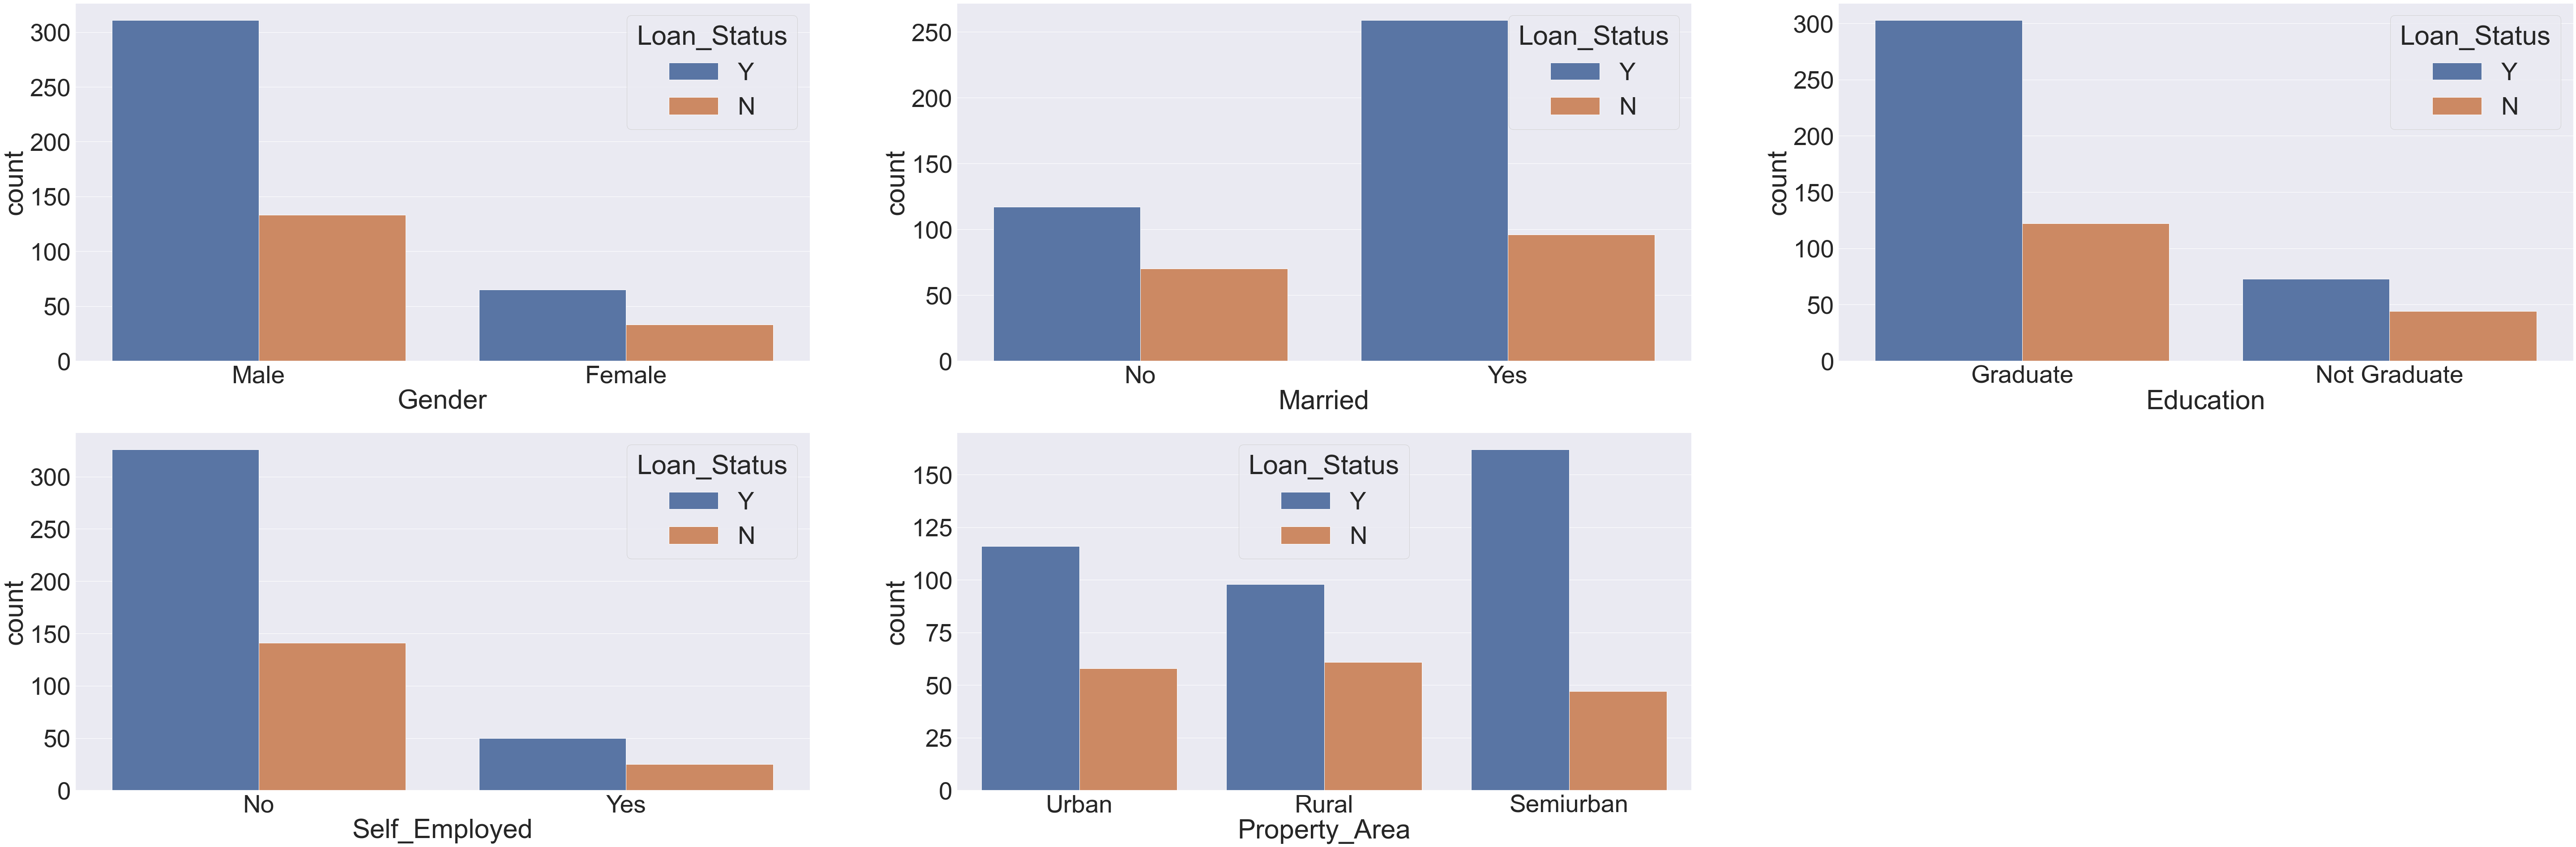

In [13]:
plt.figure(figsize = (100, 50))
sns.set(font_scale = 5)
plt.subplot(331)
sns.countplot(x=df['Gender'],hue=df['Loan_Status'])

plt.subplot(332)
sns.countplot(x=df['Married'],hue=df['Loan_Status'])

plt.subplot(333)
sns.countplot(x=df['Education'],hue=df['Loan_Status'])

plt.subplot(334)
sns.countplot(x=df['Self_Employed'],hue=df['Loan_Status'])

plt.subplot(335)
sns.countplot(x=df['Property_Area'],hue=df['Loan_Status'])

# Replacing Variable values to Numeric data For Logistic Regression

In [14]:
df['Loan_Status'].replace('Y',1,inplace=True)
df['Loan_Status'].replace('N',0,inplace=True)

In [15]:
df['Loan_Status'].value_counts()

1    376
0    166
Name: Loan_Status, dtype: int64

In [16]:
df.Gender=df.Gender.map({'Male':1,'Female':0})
df['Gender'].value_counts()

1    444
0     98
Name: Gender, dtype: int64

In [17]:
df.Married=df.Married.map({'Yes':1,'No':0})
df['Married'].value_counts()

1    355
0    187
Name: Married, dtype: int64

In [18]:
df.Dependents=df.Dependents.map({'0':0,'1':1,'2':2,'3+':3})
df['Dependents'].value_counts()

0    309
1     94
2     94
3     45
Name: Dependents, dtype: int64

In [19]:
df.Education=df.Education.map({'Graduate':1,'Not Graduate':0})
df['Education'].value_counts()

1    425
0    117
Name: Education, dtype: int64

In [20]:
df.Self_Employed=df.Self_Employed.map({'Yes':1,'No':0})
df['Self_Employed'].value_counts()

0    467
1     75
Name: Self_Employed, dtype: int64

In [21]:
df.Property_Area=df.Property_Area.map({'Urban':2,'Rural':0,'Semiurban':1})
df['Property_Area'].value_counts()

1    209
2    174
0    159
Name: Property_Area, dtype: int64

In [22]:
df['LoanAmount'].value_counts()

146.412162    19
120.000000    15
100.000000    14
110.000000    13
187.000000    12
              ..
280.000000     1
240.000000     1
214.000000     1
59.000000      1
253.000000     1
Name: LoanAmount, Length: 195, dtype: int64

In [23]:
df['Credit_History'].value_counts()

1.0    468
0.0     74
Name: Credit_History, dtype: int64

# 'Credit_History' --->  Independent Variable
#  'Loan_Status'   --->  Dependent Variable

# Final DataFrame

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1


# Importing Packages for Classification algorithm

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Splitting the data into Train & Test sets

In [26]:
X = df.iloc[1:542,1:12].values
y = df.iloc[1:542,12].values

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=0)

# Logistic Regression

# Now for our classification model we use Logistic Regression
# The Activation function we are going to use for LR is Sigmoid Function

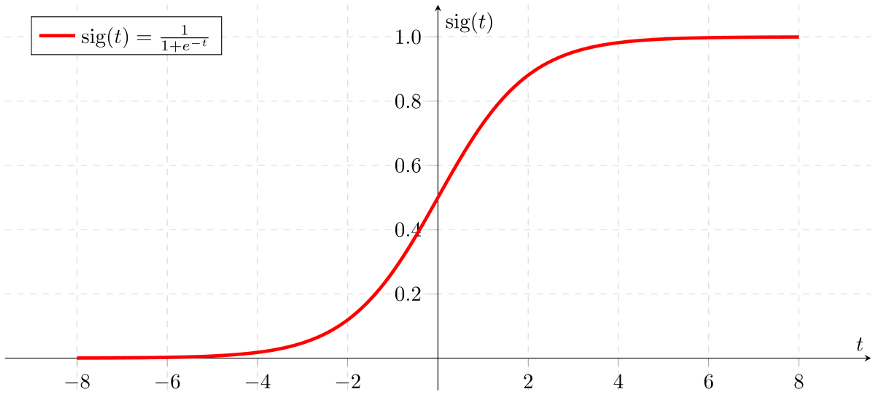

# Logistic Regression

In [32]:
model = LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
print('Logistic Regression accuracy = ', metrics.accuracy_score(y_pred,y_test))

Logistic Regression accuracy =  0.7852760736196319


In [28]:
print("y_predict",y_pred)
print("y_test",y_test)

y_predict [1 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 0
 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1
 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0]
y_test [0 0 0 0 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0
 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 0]


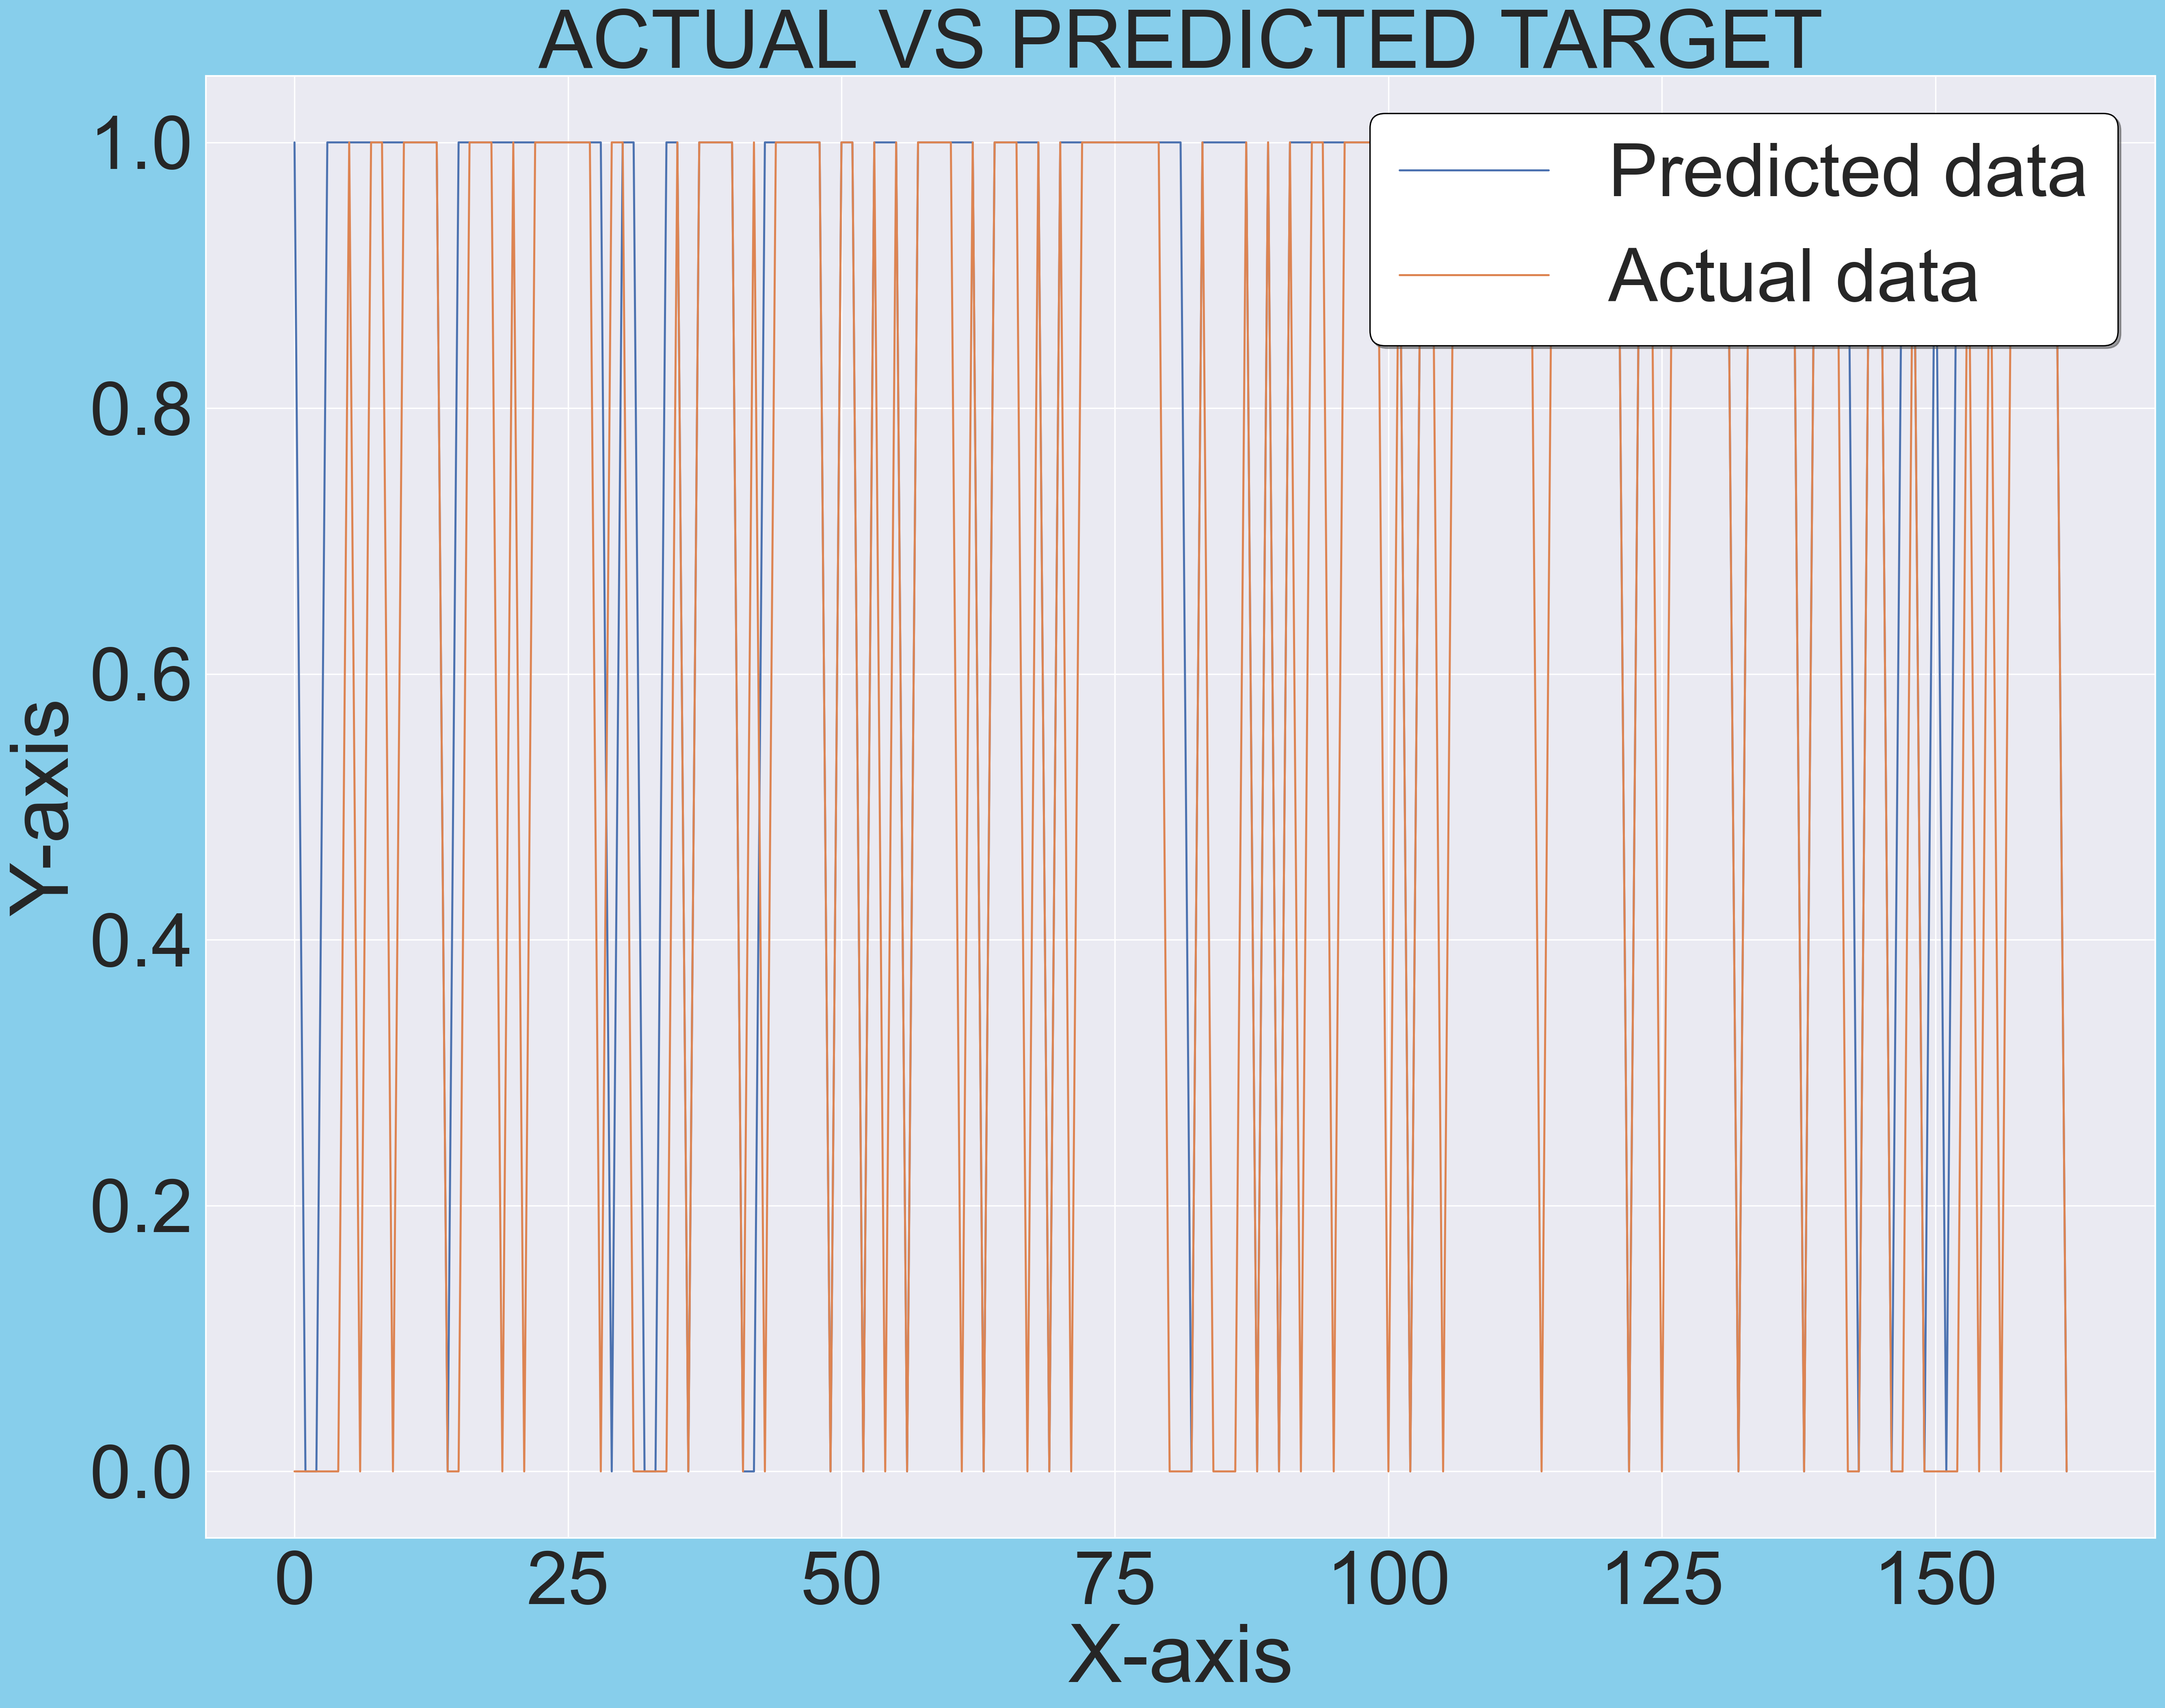

In [29]:
fig = plt.figure(figsize =(20,15),dpi=240,facecolor='skyblue',edgecolor='black')
ax1 = fig.add_axes([1, 1, 1, 1],xlabel='X-axis',ylabel='Y-axis',title='ACTUAL VS PREDICTED TARGET')



plt.plot(y_pred)
plt.plot(y_test)
plt.legend(['Predicted data','Actual data'],facecolor='w',loc='upper right',shadow=True,edgecolor='black' )


# Decision Tree

In [29]:
model2=DecisionTreeClassifier()
model2.fit(X_train,y_train)

dt_prediction=model2.predict(X_test)
print('Decision Tree Accuracy = ', metrics.accuracy_score(dt_prediction,y_test))

Decision Tree Accuracy =  0.7177914110429447


# Random Forest

In [31]:
model3=RandomForestClassifier()
model3.fit(X_train,y_train)

Rf_prediction=model2.predict(X_test)
print('Random Forest Accuracy = ', metrics.accuracy_score(Rf_prediction,y_test))

Random Forest Accuracy =  0.7177914110429447


In [2]:
from tkinter import *

In [3]:
def Predict(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,lbl_result1):
    f1=float(e1.get())
    
    f2=float(e2.get())
    
    
    f3=float(e3.get())
    
    f4=float(e4.get())
        
    f5=float(e5.get())
    
    f6=float(e6.get())
        
    f7=float(e7.get())
    
    f8=float(e8.get())
    
    f9=float(e9.get())

    f10=float(e10.get())
    
    f11=float(e11.get())
    
    res=np.array([[f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11]])
   
    pred=model.predict(res)
    np.set_printoptions(precision=2)
    
    lbl_result1.configure(text=pred,font=('Lucida Handwriting',25,'bold'))

In [4]:
root =Tk()
root.title("GUI")
root.state('zoomed')
root.resizable(width = True,height = True)
root.configure(bg = "White")

def home_screen():
    MainFrame = Frame(root, bg = "gray")
    MainFrame.pack(fill=BOTH,expand=True)
    root_lbl = Label(MainFrame,text = "LOAN PREDICTION",bg = "cyan", fg = "green",font = ('',40,'italic','underline','bold'), width=50, height=2, relief='raised', borderwidth=5)
    root_lbl.pack(anchor = N,fill=X)
    q_frame = Frame(MainFrame,bg ="gray", width = 1400, height=800, relief='flat', borderwidth=5)
    q_frame.pack(side = LEFT,anchor = W,expand = True)

    br_file = Label(q_frame,text = "ENTER ALL DETAILS :",bg = "gray",fg="black",font = ('',38,'bold'),relief = 'flat',width = 20)
    br_file.place(relx = 0.001,rely = 0.001)
    
    
    Label(MainFrame, text='Gender',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.3)
    e1 = Entry(MainFrame,font=('bold',15))
    e1.place(relx = 0.27, rely = 0.31)
    e1.focus()

    
    Label(MainFrame, text='Married',fg="orange",font=('bold',25)).place(relx = 0.5,rely = 0.3)
    e2= Entry(MainFrame,font=('bold',15))
    e2.place(relx = 0.68, rely = 0.31)
    e2.focus()
    
    
    Label(MainFrame, text='Dependents',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.4)
    e3 = Entry(MainFrame,font=('bold',15))
    e3.place(relx = 0.27, rely = 0.41)
    e3.focus()
    

    
    Label(MainFrame, text='Education',fg="orange",font=('bold',25)).place(relx = 0.5,rely = 0.4)
    e4 = Entry(MainFrame,font=('bold',15))
    e4.place(relx = 0.68,rely = 0.41)
    e4.focus()
    
    
    Label(MainFrame, text='Self Employed',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.5)
    e5 = Entry(MainFrame,font=('bold',15))
    e5.place(relx = 0.27, rely = 0.51)
    e5.focus()
    
    
    
    Label(MainFrame, text='Applicant Income',fg="orange",font=('bold',25)).place(relx = 0.5,rely = 0.5)
    e6 = Entry(MainFrame,font=('bold',15))
    e6.place(relx = 0.68, rely = 0.51)
    e6.focus()
    
    
    Label(MainFrame, text='Co Applicant Income',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.6)
    e7 = Entry(MainFrame,font=('bold',15))
    e7.place(relx = 0.27, rely = 0.61)
    e7.focus()
    
    
    
    Label(MainFrame, text='Loan Amount ',fg="orange",font=('bold',25)).place(relx = 0.5,rely = 0.6)
    e8 = Entry(MainFrame,font=('bold',15))
    e8.place(relx = 0.68, rely = 0.61)
    e8.focus()
    
    
    
    Label(MainFrame, text='Loan Amount Term',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.7)
    e9 = Entry(MainFrame,font=('bold',15))
    e9.place(relx = 0.27, rely = 0.71)
    e9.focus()
    
    
    Label(MainFrame, text='Credit History',fg="orange",font=('bold',25)).place(relx = 0.5,rely = 0.7)
    e10 = Entry(MainFrame,font=('bold',15))
    e10.place(relx = 0.68, rely = 0.71)
    e10.focus()
    
    Label(MainFrame, text='Property Area',fg="orange",font=('bold',25)).place(relx = 0.1,rely = 0.8)
    e11 = Entry(MainFrame,font=('bold',15))
    e11.place(relx = 0.27, rely = 0.81)
    e11.focus()
    
    predict_btn = Button(q_frame,text = "PREDICT",command=lambda: Predict(e1,e2,e3,e4,e5,e6,e7,e8,e9,e10,e11,lbl_result1),bg = "blue",fg="magenta",font = ('',20,'bold'),relief = 'raised')
    predict_btn.place(relx = 0.47,rely = 0.85)
    
    lbl_result1=Label(q_frame,text='',font=('',25,'bold'),bg='lightgreen',fg='indianred')
    lbl_result1.place(relx=0.6,rely=0.85)
    
home_screen()
root.mainloop()

# CONCLUSION:

# 1. The Loan Status is heavily dependent on the Credit History for Predictions.

# 2. The Logistic Regression algorithm gives us the maximum Accuracy (79% approx) compared to the other 3 Machine Learning Classification algorithms.